# "Alexa - How many Alexa's are there?"

Research Question: How has the popularity of the name `Alexa` changed in the U.S. over time and in response to Amazon's virtual assistant?

Contents
- [Import common American names](#import)
- [Normalize name popularity over time](#normalize_names)
- [Amazon Alexa Unit Sales](#unit_sales)
- [Create a Static Chart](#static_chart)

In [1]:
#  Call libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

<a id ='import'></a>
## Import common (American) names
- The Social Security office publishes data capturing the relative frequency of given names by birth year.  The data is downloadable as a series of .txt files with each record individual files has the format 'name, sex, number,' where number is the number of occurrences of the name.  Each file is sorted on sex then on the number of occurrences in descending order.  (When there is a tie in frequency, names are listed in alphabetical order.)  To protect privacy, the SSA does not publish names that had less than 5 occurrences in a given birth year.
    - See https://www.ssa.gov/oact/babynames/limits.html

In [2]:
import glob

# Create list and count of filenames
file_list = sorted(glob.glob('ssn_names/yob*.txt'))
file_count = len(file_list)

# Initialize ssn_df
ssn_df = pd.DataFrame({
    'name':[],
    'gender':[],
    'count':[]
})

In [3]:
col_names = list(ssn_df.columns)

# Concatenate individual birth-year files together
for file_name in file_list:
    tmp_df = pd.read_csv(file_name, names = col_names)
    tmp_df["year"] = int(file_name[13:17])
    ssn_df = pd.concat([ssn_df, tmp_df], ignore_index = True)

# Preserve raw copy and save count and year variables in new df as integer types.
df = ssn_df.copy()
df["year"] = df["year"].astype(int)
df["count"] = df["count"].astype(int)

In [4]:
# Review data
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020863 entries, 0 to 2020862
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   name    object
 1   gender  object
 2   count   int64 
 3   year    int64 
dtypes: int64(2), object(2)
memory usage: 61.7+ MB
None


,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020


In [5]:
# Tally the total number of names per year by gender
count_names = pd.crosstab(ssn_df['year'], ssn_df['gender'])
count_names

gender,F,M
year,,
1880.0,942,1058
1881.0,938,996
1882.0,1028,1099
1883.0,1054,1030
1884.0,1172,1125
...,...,...
2016.0,18847,14184
2017.0,18404,14230
2018.0,18105,14073


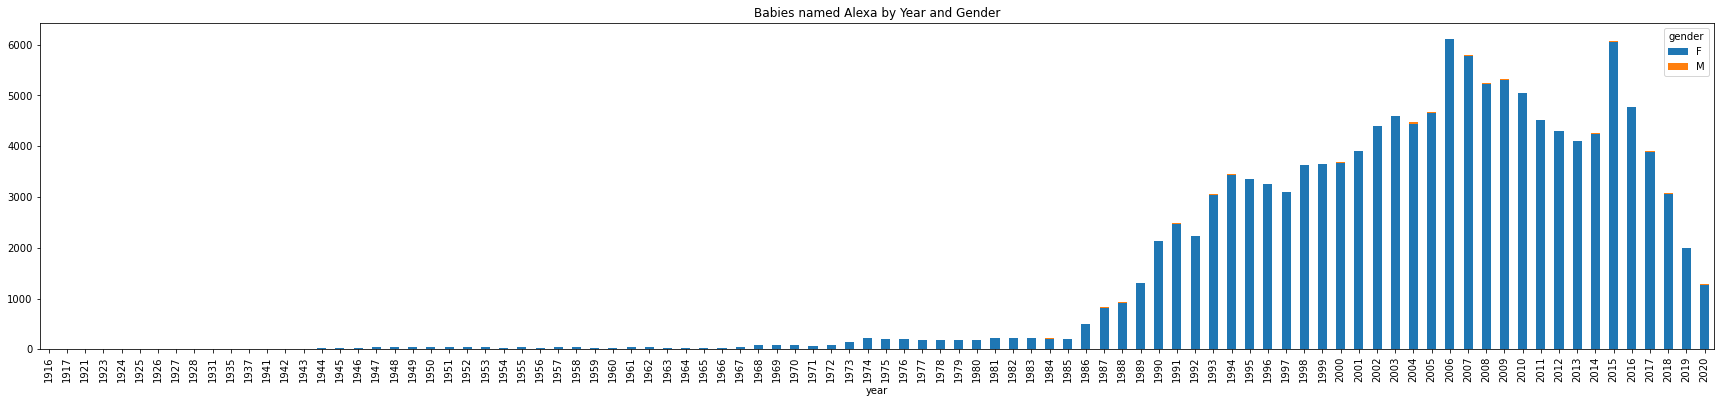

In [6]:
# Question:  How frequently is Alexa given to baby girls vs baby boys?
df_alexa = df[df["name"]=="Alexa"].groupby(["year","gender"])["count"].sum().unstack().fillna(0)

df_alexa.plot(kind = "bar", stacked = True, figsize=(30,6))

plt.title('Babies named Alexa by Year and Gender')
plt.xticks(rotation=90, ha='center')

plt.show()

The above bar chart and tables show (as you'd expect) that the name Alexa is overwhelmingly given to baby girls.  The first year in which at least five Americans were named Alexa was 1916, and was a rare name until the 1960s.  THe name became more popular first in the mid-1970s, and then increased rapidly in popularity from the late 1980s through the mid-2010s.  After a local peak in 2015, the number of girls named Alexa declined rapidly.

It might be useful to zoom in on the period since 2000.

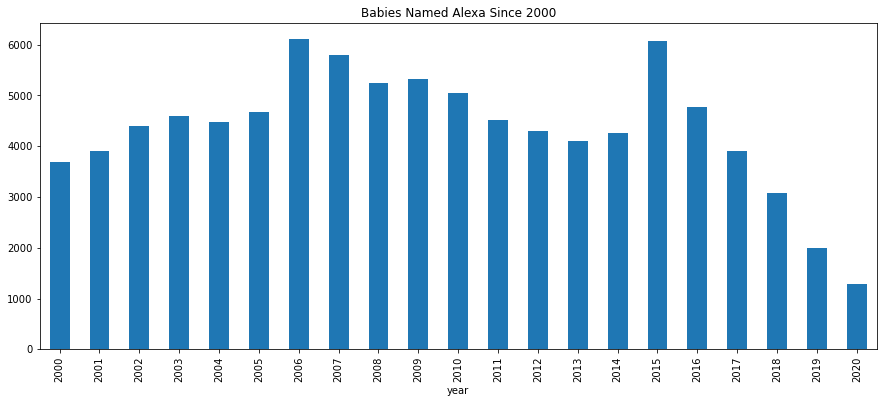

In [7]:
# Specify year cutoff
YEAR_CUTOFF = 2000

# Add up boys and girls, and format total to show commas
df_alexa["total"] = (df_alexa["F"] + df_alexa["M"]).astype("int")
df_alexa['ticks'] = df_alexa['total'].map('{:,d}'.format)

# Plot Total
df_alexa["total"].loc[YEAR_CUTOFF:].plot(kind = "bar", 
                                         stacked = True, 
                                         use_index = True,
                                         figsize=(15,6)
                                        )

plt.title('Babies Named Alexa Since '+str(YEAR_CUTOFF))
plt.xticks(rotation=90, ha='center')

plt.show()

<a id ='normalize_names'></a>
### Normalize name popularity over time

In [8]:
#df_alexa = df[df["name"]=="Alexa"].groupby(["year","gender"])["count"].sum().unstack().fillna(0)
df_alexa

gender,F,M,total,ticks
year,,,,
1916,5.0,0.0,5,5
1917,5.0,0.0,5,5
1921,6.0,0.0,6,6
1923,5.0,0.0,5,5
1924,5.0,0.0,5,5
...,...,...,...,...
2016,4771.0,5.0,4776,"4,776"
2017,3892.0,5.0,3897,"3,897"
2018,3064.0,8.0,3072,"3,072"


In [9]:
# Find total names per year
df_tot = pd.DataFrame(df.groupby(["year"])["count"].sum())
df_tot["all_names"] = df_tot["count"]

# Join all_names onto df_alexa
df_alexa = pd.concat([df_alexa, df_tot], axis = 1)

In [10]:
df_alexa

,F,M,total,ticks,count,all_names
year,,,,,,
1880,NaN,NaN,NaN,NaN,201484,201484
1881,NaN,NaN,NaN,NaN,192691,192691
1882,NaN,NaN,NaN,NaN,221533,221533
1883,NaN,NaN,NaN,NaN,216944,216944
1884,NaN,NaN,NaN,NaN,243461,243461
...,...,...,...,...,...,...
2016,4771.0,5.0,4776.0,"4,776",3662277,3662277
2017,3892.0,5.0,3897.0,"3,897",3568294,3568294
2018,3064.0,8.0,3072.0,"3,072",3505963,3505963


In [11]:
# Find the relative popularity of Alexa over time by dividing all "Alexa's" by total names
df_alexa["rel_freq"] = df_alexa["total"] / df_alexa["all_names"]

# For better interpretability, find # per 100,000 names
df_alexa["per_100k"] = df_alexa["rel_freq"] * 100000

df_alexa.loc[1980:]

,F,M,total,ticks,count,all_names,rel_freq,per_100k
year,,,,,,,,
1980,179.0,0.0,179.0,179,3445061,3445061,0.000052,5.195844
1981,222.0,0.0,222.0,222,3459759,3459759,0.000064,6.416632
1982,215.0,0.0,215.0,215,3508362,3508362,0.000061,6.128216
1983,219.0,0.0,219.0,219,3463527,3463527,0.000063,6.323034
1984,210.0,6.0,216.0,216,3488686,3488686,0.000062,6.191443
1985,201.0,0.0,201.0,201,3568898,3568898,0.000056,5.631991
1986,499.0,5.0,504.0,504,3556789,3556789,0.000142,14.170084
1987,821.0,9.0,830.0,830,3605245,3605245,0.000230,23.022014
1988,918.0,7.0,925.0,925,3694402,3694402,0.000250,25.037882


<a id ='unit_sales'></a>
## Amazon Alexa Unit Sales

According to a [May 2021 post on Statista](https://www.statista.com/statistics/1022701/worldwide-amazon-echo-unit-shipment/), Amazon's Echo unit sales started at 600,000 in 2014 and grew to 53.9 million in 2020.  The post is authored by Lionel Sujay Vailshery, who is touted as a "research expert covering the consumer electronics industry."  I don't have a subscription to Statista, so I can't really verify Vailshery's underlying methodology.

In [12]:
echo_df = pd.DataFrame({
    'year':[2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'units':[0.6, 2.2, 8.5, 26.2, 32.0, 42.0, 53.9]
})

echo_df = echo_df.set_index("year")

In [13]:
# Merge Alexa unit sales into dataframe with Alexa baby names
df_alexa = pd.concat([df_alexa, echo_df], axis = 1)
df_alexa['year'] = df_alexa.index
df_alexa.loc[2011:]

,F,M,total,ticks,count,all_names,rel_freq,per_100k,units,year
year,,,,,,,,,,
2011,4509.0,8.0,4517.0,"4,517",3654691,3654691,0.001236,123.594580,NaN,2011
2012,4295.0,0.0,4295.0,"4,295",3653979,3653979,0.001175,117.543095,NaN,2012
2013,4101.0,7.0,4108.0,"4,108",3641604,3641604,0.001128,112.807433,NaN,2013
2014,4249.0,7.0,4256.0,"4,256",3701784,3701784,0.001150,114.971592,0.6,2014
2015,6052.0,14.0,6066.0,"6,066",3695531,3695531,0.001641,164.144206,2.2,2015
2016,4771.0,5.0,4776.0,"4,776",3662277,3662277,0.001304,130.410671,8.5,2016
2017,3892.0,5.0,3897.0,"3,897",3568294,3568294,0.001092,109.211853,26.2,2017
2018,3064.0,8.0,3072.0,"3,072",3505963,3505963,0.000876,87.622145,32.0,2018
2019,1998.0,6.0,2004.0,"2,004",3455946,3455946,0.000580,57.987017,42.0,2019


<a id ='static_chart'></a>
## Create a Static Chart

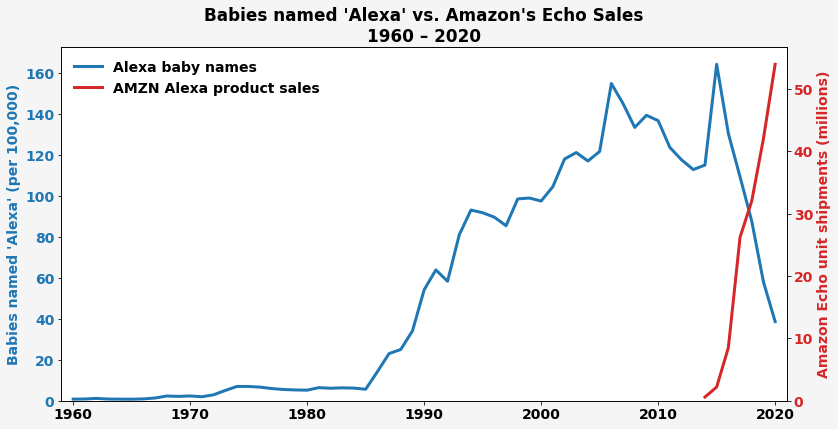

In [14]:
# Graph "Alexa's" per 100k and AMazon's Alexa unit sales

# Choose chart cut_off
CHART_CUTOFF = 1960

df_chart = df_alexa.loc[CHART_CUTOFF:]

# Choose font and line weight
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

linewidth = 3.0    
bg_col = 'whitesmoke'


# Graph names on the primary axis
fig, ax1 = plt.subplots(figsize = (13,6.5))
color = 'tab:blue'
ln1 = ax1.plot(df_chart.index, df_chart["per_100k"], color = color, linewidth = linewidth, label = 'Alexa baby names')
ax1.set_ylabel("Babies named 'Alexa' (per 100,000)", color = color, weight = 'bold')
ax1.tick_params(axis = 'y', labelcolor = color)
ax1.set_ylim(0, df_chart["per_100k"].max() * 1.05)

# Graph Amazon's unit sales on secondary axis
ax2 = ax1.twinx()   # instantiate a second axis that shares the same x-axis
color = 'tab:red'
ln2 = ax2.plot(df_chart.index, df_chart["units"], color = color, linewidth = linewidth, label = 'AMZN Alexa product sales')
ax2.set_ylabel("Amazon Echo unit shipments (millions)", color = color, weight = 'bold')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, df_chart["units"].max() * 1.05)

# Legend
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc = 2, frameon = False)

# Beautify the plot
plt.xlim(df_chart['year'].min() - 1 , df_chart['year'].max() + 1)
plt.title("Babies named 'Alexa' vs. Amazon's Echo Sales\n"+str(CHART_CUTOFF)+" – 2020", weight = 'bold')
fig.patch.set_facecolor(bg_col)

plt.show()
fig.savefig('alexa.png')

### Top-level Comment for r/dataisbeautiful

Tools: created in python with matplotlib.  

Baby name source:  The Social Security office publishes data capturing the relative frequency of given names by birth year. The data is downloadable as a series of .txt files with each record individual files has the format 'name, sex, number,' where number is the number of occurrences of the name. Each file is sorted on sex then on the number of occurrences in descending order. (When there is a tie in frequency, names are listed in alphabetical order.) To protect privacy, the SSA does not publish names that had less than 5 occurrences in a given birth year.
See https://www.ssa.gov/oact/babynames/limits.html

AMZN Echo product sales source:  https://www.statista.com/statistics/1022701/worldwide-amazon-echo-unit-shipment/